In [1]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Paths to your DICOM files
# dicom_path1 = 'image/1459541791.dcm'
# dicom_path2 = 'image/1864590858.dcm'

# Step 1: Read the DICOM files
dcm_data1 = pydicom.dcmread('1459541791.dcm')
dcm_data2 = pydicom.dcmread('1864590858.dcm')

# Step 2: Extract pixel data
image1 = dcm_data1.pixel_array
image2 = dcm_data2.pixel_array

height, width = image1.shape
new_width = width // 2

image1 = image1[:, new_width]
image2 = image2[new_width, :]

height, width = image2.shape
new_width = width // 2

# Step 3: Normalize the pixel data
image1 = (image1 - np.min(image1)) / (np.max(image1) - np.min(image1)) * 255
image1 = image1.astype(np.uint8)

image2 = (image2 - np.min(image2)) / (np.max(image2) - np.min(image2)) * 255
image2 = image2.astype(np.uint8)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

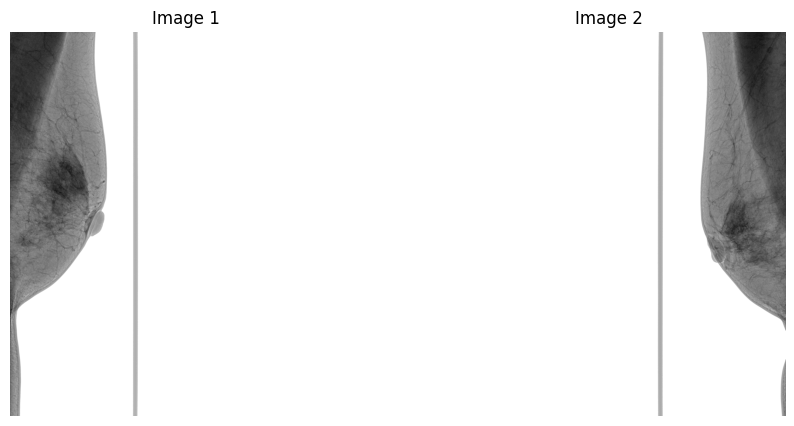

In [8]:
# Step 4: Display the images and source information
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title(f"Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title(f"Image 2")
plt.axis('off')
plt.show()

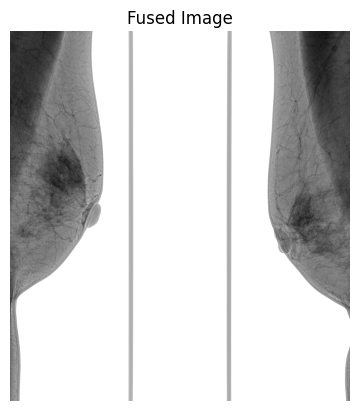

In [9]:
# Step 5: Fuse the images
image1_resized = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
fused_image = cv2.addWeighted(image1_resized, 0.5, image2, 0.5, 0)

plt.imshow(fused_image, cmap='gray')
plt.title("Fused Image")
plt.axis('off')
plt.show()

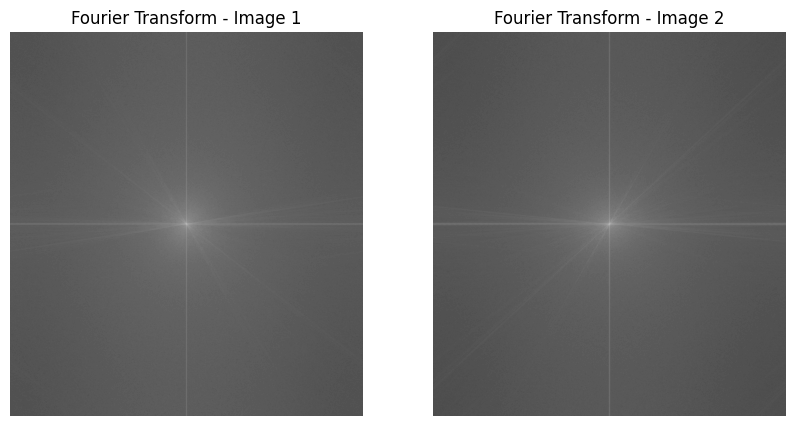

In [11]:
# Step 6: Apply Fourier Transform
f1 = np.fft.fft2(image1)
f1_shift = np.fft.fftshift(f1)
magnitude_spectrum1 = 20 * np.log(np.abs(f1_shift))

f2 = np.fft.fft2(image2)
f2_shift = np.fft.fftshift(f2)
magnitude_spectrum2 = 20 * np.log(np.abs(f2_shift))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum1, cmap='gray')
plt.title("Fourier Transform - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title("Fourier Transform - Image 2")
plt.axis('off')
plt.show()

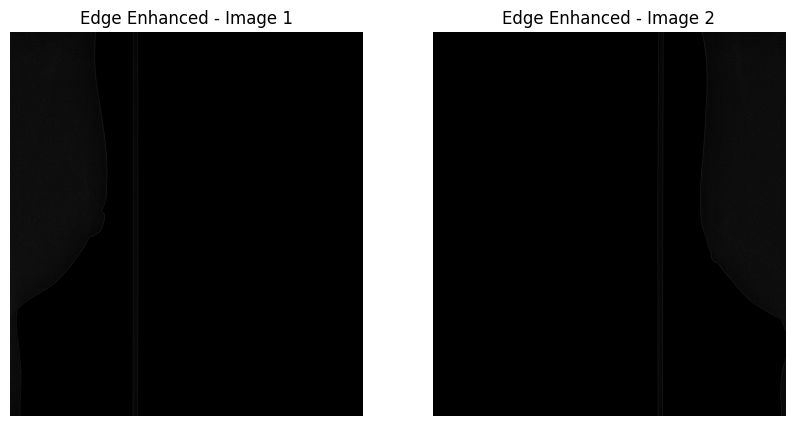

In [12]:
# Step 7: Edge Enhancement
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

edge_image1 = cv2.filter2D(image1, -1, kernel)
edge_image2 = cv2.filter2D(image2, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edge_image1, cmap='gray')
plt.title("Edge Enhanced - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_image2, cmap='gray')
plt.title("Edge Enhanced - Image 2")
plt.axis('off')
plt.show()

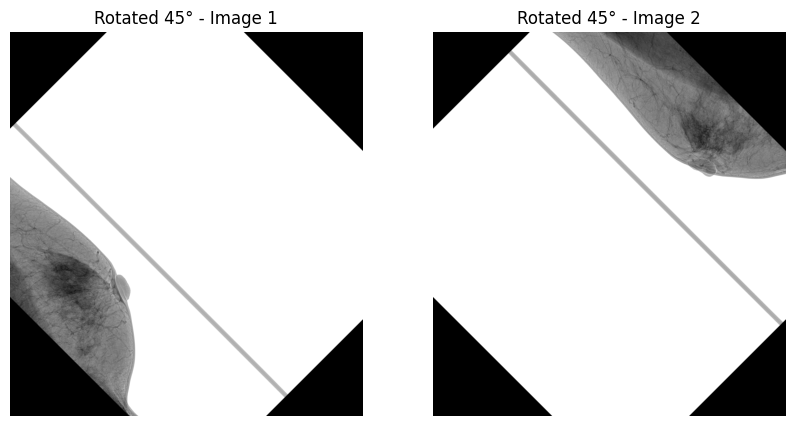

In [13]:
# Step 8: Rotate the images by 45 degrees
center1 = (image1.shape[1] // 2, image1.shape[0] // 2)
matrix1 = cv2.getRotationMatrix2D(center1, 45, 1)
rotated_image1 = cv2.warpAffine(image1, matrix1, (image1.shape[1], image1.shape[0]))

center2 = (image2.shape[1] // 2, image2.shape[0] // 2)
matrix2 = cv2.getRotationMatrix2D(center2, 45, 1)
rotated_image2 = cv2.warpAffine(image2, matrix2, (image2.shape[1], image2.shape[0]))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image1, cmap='gray')
plt.title("Rotated 45° - Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image2, cmap='gray')
plt.title("Rotated 45° - Image 2")
plt.axis('off')
plt.show()



---

Breakdown

1. Read and Normalize Images:

Read .dcm files with pydicom.

Normalize pixel values to the range [0, 255] for proper visualization.



2. Display Images and Metadata:

Use matplotlib to display the images with their respective sources.



3. Image Fusion:

Resize the first image to match the dimensions of the second, then fuse using cv2.addWeighted.



4. Fourier Transform:

Apply numpy.fft for frequency domain analysis and visualize the magnitude spectrum.



5. Edge Enhancement:

Use a Laplacian-like kernel for edge detection and enhancement with `cv2